# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
import matplotlib.dates as mdates
import calendar
import matplotlib.cm as cm
import matplotlib.colors as mcl
import matplotlib.colorbar as mcb
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:
months_str = list(calendar.month_name)
months_str.append(months_str[0])
months_str = months_str[1:-1]
my_variables = ["tmax", "tmin", "prcp", "snow"]

In [3]:
my_domains = ["Ann Arbor, MI"]
my_region = list(map(lambda x: " ".join(x.split(" ")[1:]), my_domains))
my_state_ID = list(map(lambda x: x.split(" ")[0], my_domains))
my_region = list(map(lambda x: x.split(",")[0], my_domains))
my_state_ID = list(map(lambda x: x.split(",")[-1][1:], my_domains))

In [4]:
 # ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/station-inventories/zipcodes-normals-stations.txt
zip_codes = pd.read_table("ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/station-inventories/zipcodes-normals-stations.txt", header= None)
zip_codes.rename(columns= {zip_codes.columns[0] : "All string"} , inplace = True)
zip_codes["CODE"] = list(map(lambda x: x.split(" ")[0], zip_codes["All string"]))
zip_codes["ZIP"] = list(map(lambda x: x.split(" ")[1], zip_codes["All string"]))
zip_codes["Region"] = list(map(lambda x: x.split(" ")[2:], zip_codes["All string"]))
zip_codes["Region"] = zip_codes["Region"].apply(" ".join)
zip_codes.drop(["All string"], axis=1, inplace = True)

In [6]:
# ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/station-inventories/allstations.txt
codes = pd.read_table("ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/station-inventories/allstations.txt", header= None)
codes.rename(columns= {codes.columns[0] : "All string"} , inplace = True)
codes["HCN"] = codes["All string"].str.find("HCN") > 0
codes = codes[codes["HCN"]==True]
codes.drop("HCN", axis=1, inplace = True)
codes["CODE"] = list(map(lambda x: x.split()[0], codes["All string"]))
codes["All string"] = codes["All string"].apply(''.join)
codes["Lat"] = list(map(lambda x: x.split()[1], codes["All string"]))
codes["Lat"] = codes["Lat"].astype("float")
codes["All string"] = list(map(lambda x: x.split()[2:], codes["All string"]))
codes["All string"] = codes["All string"].apply(" ".join)
codes["Lon"] = list(map(lambda x: x.split()[0], codes["All string"]))
codes["Lon"] = codes["Lon"].astype("float")
codes["All string"] = list(map(lambda x: x.split()[1:], codes["All string"]))
codes["All string"] = codes["All string"].apply(" ".join)
codes["Elev"] = list(map(lambda x: x.split()[0], codes["All string"])) 
codes["Elev"] = codes["Elev"].astype("float")
codes["All string"] = list(map(lambda x: x.split()[1:], codes["All string"]))
codes["All string"] = codes["All string"].apply(" ".join)
codes["State ID"] = list(map(lambda x: x.split()[0], codes["All string"]))
codes["All string"] = list(map(lambda x: x.split()[1:], codes["All string"]))
codes["All string"] = codes["All string"].apply(" ".join)
# aux = list(map(lambda x, y: ((codes["State ID"] == x) &  (codes["All string"].str.contains(y, case=False)) ), my_state_ID, my_region ))
# codes = pd.concat([codes.loc[aux[i][:]==True] for i in range(len(aux))])
codes.drop("All string", axis=1, inplace = True)
my_code_reg_pd = pd.merge(zip_codes, codes, how="inner", left_on="CODE", right_on="CODE")


In [8]:
# "ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/products/

def pd_with_variable(my_string_folder):
    
    var_aux = pd.read_csv("ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/products/{}-normal.txt".format(my_string_folder), header = None)
    var_aux.rename(columns= {var_aux.columns[0] : "All string"} , inplace = True)
    var_aux["All string"]= list(map(lambda x: x.split(), var_aux["All string"]))
    var_aux["All string"] = var_aux["All string"].apply(" ".join)
    var_aux["CODE"] = list(map(lambda x: x.split(" ")[0], var_aux["All string"]))
    var_aux["All string"] = list(map(lambda x: x.split(" ")[1:], var_aux["All string"]))
    var_aux["All string"] = var_aux["All string"].apply(" ".join)

    for idx_name, cname in enumerate(months_str):
        var_aux[cname] = list(map(lambda x: x.split(" ")[idx_name], var_aux["All string"]))
    var_aux.drop("All string",axis=1, inplace=True)
    var_aux.set_index("CODE",inplace=True)

    for col in var_aux.columns:
        var_aux[col] = var_aux[col].map(lambda x: x[0:-1])
    var_aux[var_aux.columns] = var_aux[var_aux.columns].astype(int)

    var_aux[var_aux==-9999] = np.NaN
    var_aux[var_aux==-8888] = np.NaN
    var_aux[var_aux==-7777] = 0
    var_aux[var_aux==-6666] = np.NaN
    var_aux[var_aux==-5555] = np.NaN
    my_var = my_string_folder[-4:]
    var_aux["Var"] = my_var
    var_aux.reset_index(inplace=True)
    var_aux.set_index(["CODE","Var"], inplace=True)
    if (my_var == "prcp"): 
        var_aux = var_aux*0.01 #from README: hundredths of inches for precipitation,
    else:
        var_aux = var_aux*0.1 # tenths of degrees Fahrenheit, tenths of inches for snowfall, 
    
    if (my_var == "tmin") | (my_var =="tmax"):
        var_aux = (var_aux-32)* 0.55
    if (my_var == "snow") | (my_var == "prcp"):
        var_aux = var_aux *2.54
    var_aux.reset_index(inplace=True)
    var_aux.set_index("CODE", inplace=True)
    return var_aux

my_string_folder_var = ["temperature/mly-{}".format(x) for x in ["tmin","tmax"]] + ["precipitation/mly-{}".format(y) for y in ["prcp","snow"]]
vars_pd_cat = pd.concat([pd_with_variable(x) for x in my_string_folder_var])
vars_pd = pd.merge(my_code_reg_pd, vars_pd_cat, how="inner",left_on="CODE",right_index=True)


In [9]:
qmin = 0.05
qmax = 0.95
cmaps = [cm.jet, cm.jet, cm.Blues, cm.Blues]
legend_labels = ["[°C]", "[°C]", "[cm]", "[cm]"]
titles = ["TMAX", "TMIN", "PRECIPITATION", "SNOWFALL"]
US_borderlines = pd.read_csv("cb_2017_us_state_500k.csv", sep =",", header=None) # US borderlines

<IPython.core.display.Javascript object>


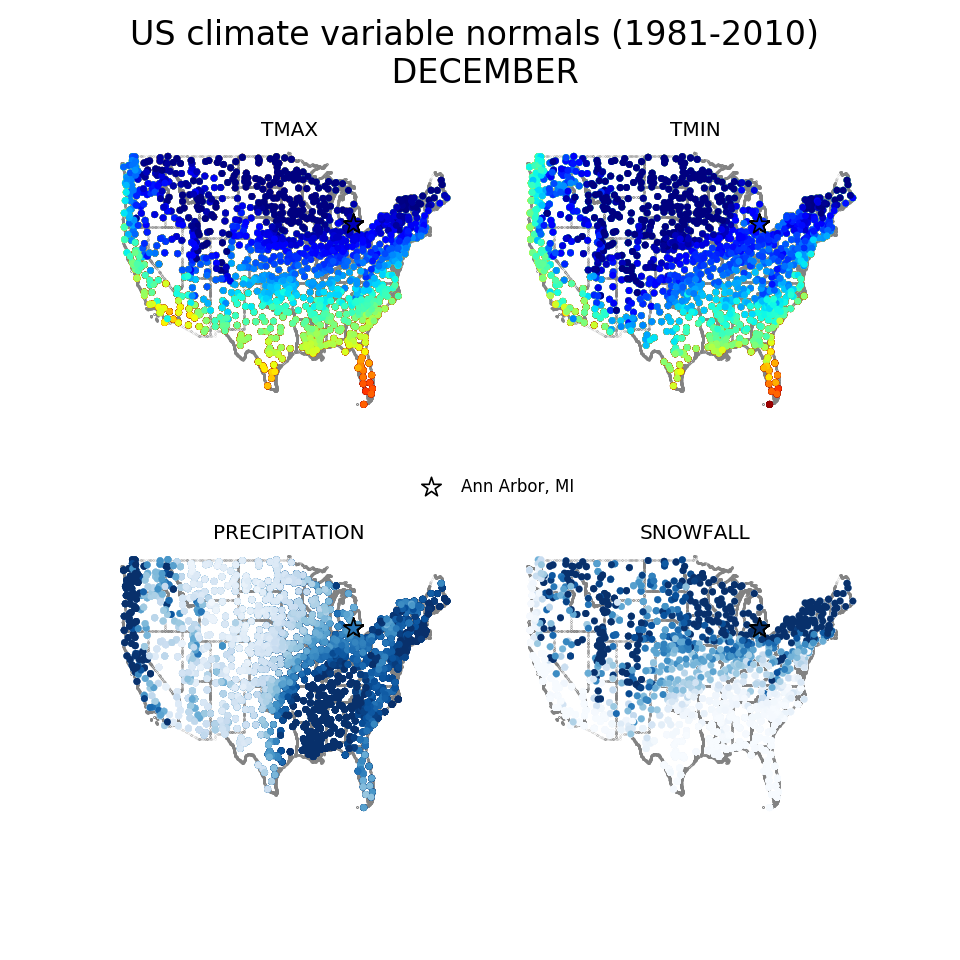

In [13]:
%matplotlib notebook

fig, ((ax1,ax2),(ax3, ax4) )= plt.subplots(2,2,figsize=(8,8))
my_axes = [ax1, ax2, ax3, ax4]
normalize = ([mcl.Normalize(vmin = round(pd.concat([vars_pd.loc[vars_pd["Var"] == my_variables[idx_axes], i] for i in months_str[0:-1]]).quantile(qmin)/10)*10, 
                            vmax = round(pd.concat([vars_pd.loc[vars_pd["Var"] == my_variables[idx_axes], i] for i in months_str[0:-1]]).quantile(qmax)/10)*10) 
             for idx_axes in range(len(my_variables))])           
fig.suptitle("US climate variable normals (1981-2010) \n" + months_str[0].upper() , fontsize = 20)

sAA = (my_axes[0].scatter(list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[0]),"Lon"]),
                     list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[0]),"Lat"]), 
                     s = 150, marker = "*", edgecolor="k", facecolor="w",
                     label = my_region[0] +  ", " +  my_state_ID[0]))

my_axes[0].legend(bbox_to_anchor=(.85, -0.3), loc='lower left', borderaxespad=0. , frameon=False)

for idx_axes, ax in enumerate(my_axes):
    ax.scatter(US_borderlines.iloc[0,:],US_borderlines.iloc[1,:], s=0.005, c="gray" ) #US borderlines LON, LAT
   
    ax.axes.set_xlim([-125, -65])
    ax.axes.set_ylim([23 ,50])
    ax.axis("off")
    ax.set_aspect(1.8)
   
    
    s1 = (ax.scatter(list(vars_pd.loc[vars_pd["Var"]==my_variables[idx_axes],"Lon"]),
                                list(vars_pd.loc[vars_pd["Var"]==my_variables[idx_axes],"Lat"]), s = 10, 
                                 c = list(vars_pd.loc[vars_pd["Var"]==my_variables[idx_axes],months_str[0]]), cmap=cmaps[idx_axes], norm = normalize[idx_axes]))

    
    sAA = (ax.scatter(list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[idx_axes]),"Lon"]),
                     list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[idx_axes]),"Lat"]), 
                     s = 150, marker = "*", edgecolor="k",
                     c = list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[idx_axes]),months_str[0]]), 
                             cmap=cmaps[idx_axes], norm = normalize[idx_axes]))

   
    if mpl.__version__[0] == "3": 
        #this does not work with mpl._version="2.0.0" of the jupyter hosted on coursera, but it works with mpl._version="3.0.2" 
        #so this check is just to avoid errors. 
        #this piece of code sets the colorbars
        axins1 = inset_axes(ax, width="30%",  # width = 50% of parent_bbox width
                            height="5%",  # height : 5%
                            loc='lower left')
        (fig.colorbar(s1, cax=axins1, orientation="horizontal", 
                     ticks = [round(pd.concat([vars_pd.loc[vars_pd["Var"] == my_variables[idx_axes], i] for i in months_str[0:-1]]).quantile(qmin)/10)*10, 
                              round(pd.concat([vars_pd.loc[vars_pd["Var"] == my_variables[idx_axes], i] for i in months_str[0:-1]]).quantile(qmax)/10)*10],
                     label = cbar_labels[idx_axes] ))
        axins1.xaxis.set_ticks_position("top")
    ax.set_title(titles[idx_axes].upper())
    

def update(curr):
    if curr == len(months_str): 
        a.event_source.stop()
    else:
        for idx_axes, ax in enumerate(my_axes):
            s1 = (ax.scatter(list(vars_pd.loc[vars_pd["Var"]==my_variables[idx_axes],"Lon"]),
                                    list(vars_pd.loc[vars_pd["Var"]==my_variables[idx_axes],"Lat"]), s = 10, 
                                     c = list(vars_pd.loc[vars_pd["Var"]==my_variables[idx_axes],months_str[curr]]), cmap=cmaps[idx_axes], norm = normalize[idx_axes]))
            sAA = (ax.scatter(list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[idx_axes]),"Lon"]),
                             list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[idx_axes]),"Lat"]), 
                             s = 150, marker = "*", edgecolor="k",
                             c = list(vars_pd.loc[(vars_pd["Region"]==my_region[0]) & 
                                      (vars_pd["State ID"]==my_state_ID[0]) & 
                                      (vars_pd["Var"]==my_variables[idx_axes]),months_str[curr]]), 
                             cmap=cmaps[idx_axes], norm = normalize[idx_axes] ))

        fig.suptitle("US climate variable normals (1981-2010) \n " + months_str[curr].upper(), fontsize = 20)
a = animation.FuncAnimation(fig, update, interval=1000)
# # a.save('US_climate_normals_months.gif', dpi=120, writer='imagemagick')